## Naive Bayes - Probabilistic Classification

### Importing Libraries & Data set

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv('/Users/liakooras/Desktop/UDEMIES/MACHINE LEARNING A-Z/Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 15 - K-Nearest Neighbors (K-NN)/Python/Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [10]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### Splitting the data set into training set and test set

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)

In [24]:
X_test = sc.transform(X_test)

### Fitting the model into the training set

In [27]:
from sklearn.naive_bayes import GaussianNB

In [29]:
classifier = GaussianNB()

In [31]:
classifier.fit(X_train,y_train)

GaussianNB()

### Predicting a new result

In [36]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


### Predicting the test set results

In [39]:
y_pred = classifier.predict(X_test)

In [41]:
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


### Making the confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [46]:
print(accuracy_score(y_test,y_pred))

0.9125


In [48]:
print(confusion_matrix(y_test,y_pred))

[[55  3]
 [ 4 18]]


### Visualising the training set

/var/folders/kw/6d_1c0rj22d1pqvkf0fldhlm0000gn/T/ipykernel_51617/2750969694.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)


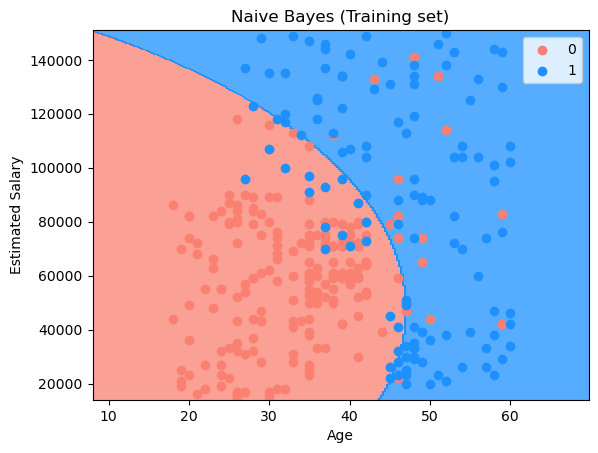

In [51]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the test set

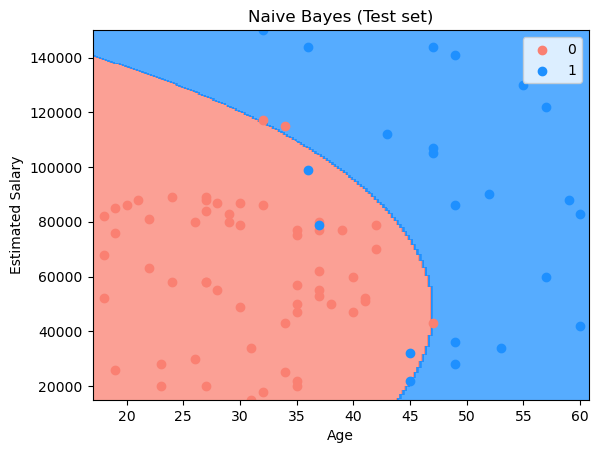

In [53]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
# Create a grid of points
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25)
)
# Predict for each point on the grid
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Define colors for scatter plot
colors = ['#FA8072', '#1E90FF']
# Plot the test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors[i], label=j
    )
# Add titles and labels
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()